# Problem 2

In [1]:
#load libraries
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
from matplotlib.pyplot import figure
import re

From the longitudinal equation of motion on slide 29 one can derive the symplectic mapping equations:
\begin{equation}
    \Delta E_{n+1}=\Delta E_{n}+V_1(\sin\phi_n-\sin\phi_s)
\end{equation}

\begin{equation}
    \phi_{n+1}=\phi_n-\frac{2\pi h\eta}{E_0\beta ^2\gamma} \Delta E_{n+1}
\end{equation}
from the nth to the (n+1)th turn where $V_1$ is the peak gap voltage per turn and $E_0$ is the rest energy. These can be used to follow a particle’s trajectory in the longitudinal phase space $(\Delta E,\phi)$ turn by turn.

# 2.1
Write a simulation program in the programming language of your choice that assumes several initial particle co-ordinates $(0, \phi)$ in the range $0 < \phi < \pi$ and calculates and applies the mapping equations over n turns. Assume a constant energy $(t = 0 \textrm{ ms}, 70 \textrm{ MeV}, \phi_s = 0)$ and use the parameters you calculated in problems 1.3 and 1.5. (Other key parameters: h = 2, $V_1$ = 19 kV per turn and a sensible number for n.) Track four more trajectories with start co-ordinates $(0.5 MeV, \pi)$, $(−0.5 MeV, −\pi)$, $(1 MeV, \pi)$, $(−1 MeV,−\pi)$ and plot out all the longitudinal phase space trajectories on one graph.

In [71]:
def nplus1(DE_n=float,phi_n=float,phi_s=float,eta=float,E_0=float,gamma=float,V_1=float):
#function that computes longitudinal phase space coordinates after the next step (n+1 from n)
    h=2 #given parameter
    beta=np.sqrt(1-1/gamma**2) #relativistic beta factor from gamma factor
    DE_np1  = DE_n+V_1*(np.sin(phi_n)-np.sin(phi_s)) #delta Energy (n+1)
    phi_np1 = phi_n - 2*np.pi*h*eta/(E_0*beta**2*gamma)*DE_np1 #delta phi (n+1)
    return [DE_np1,phi_np1] #return as a tuple of coordinates

def run(DE_0=float,phi_0=float,phi_s=float,eta=float,E_0=float,gamma=float,V_1=float,n=int):
#function that takes in initial parameters and coordinates and finds longitudinal phase space coordinates for n turns, using the nplus1 function.
    beta=np.sqrt(1-1/gamma**2) #relativistic beta factor from gamma factor
    coords=[[DE_0,phi_0]] #initial phase space coordinates
    for i in range(n): #for n turns
        newcoords=nplus1(DE_n=coords[-1][0],phi_n=coords[-1][1],phi_s=phi_s,eta=eta,E_0=E_0,gamma=gamma,V_1=V_1) #find new coordinates (n+1) from turn n
        coords.append(newcoords) #append the new coordinates to the list of coordinate tuples
    coords=np.array(coords) #turn coordinate list into a 2D array
    return coords

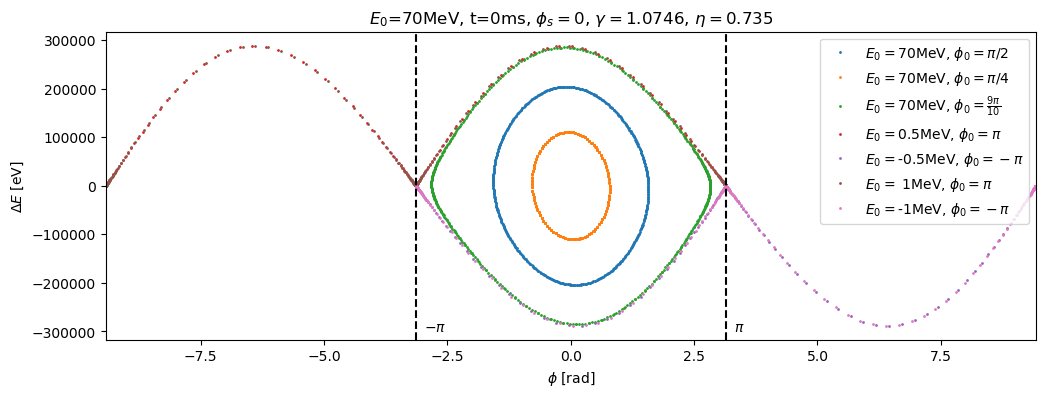

In [90]:
DE_0=0 #initial delta E
V_1= 19000 #19 kV per turn
phi_s=0 #given phase of a synchronous particle
n=500 #number of turns

E_0=70e6 #70MeV initial energy
gamma_0=1.0746 #relativistic gamma factor at E=70MeV (t=0)
eta_0=0.735 #initial slip factor (t=0)

markersize=2
figure(figsize=(12, 4), dpi=100)
coords=run(DE_0=DE_0,phi_0=np.pi/2,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=70$MeV, $\phi_0=\pi/2$',markersize=markersize)

coords=run(DE_0=DE_0,phi_0=np.pi/4,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=70$MeV, $\phi_0=\pi/4$',markersize=markersize)

coords=run(DE_0=DE_0,phi_0=9/10*np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=70$MeV, $\phi_0=\frac{9\pi}{10}$',markersize=markersize)

coords=run(DE_0=0.5,phi_0=np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=0.5$MeV, $\phi_0=\pi$',markersize=markersize)

coords=run(DE_0=-0.5,phi_0=-np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=$-0.5MeV, $\phi_0=-\pi$',markersize=markersize)

coords=run(DE_0=1,phi_0=np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=$ 1MeV, $\phi_0=\pi$',markersize=markersize)

coords=run(DE_0=-1,phi_0=-np.pi,phi_s=phi_s,eta=eta_0,E_0=E_0,gamma=gamma_0,V_1=V_1,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=$-1MeV, $\phi_0=-\pi$',markersize=markersize)

plt.axvline(x=np.pi,color='black',linestyle='--')
plt.axvline(x=-np.pi,color='black',linestyle='--')
plt.text(s=r'$\pi$',x=1.05*np.pi,y=-300000)
plt.text(s=r'$-\pi$',x=-0.95*np.pi,y=-300000)

plt.xlim(-3*np.pi,3*np.pi)

plt.title(r'$E_0$=70MeV, t=0ms, $\phi_s=0$, $\gamma=1.0746$, $\eta=0.735$')
plt.ylabel(r'$\Delta E$ [eV]')
plt.xlabel(r'$\phi$ [rad]')
plt.legend()
#plt.savefig('plots/plot2_1.png', bbox_inches='tight', dpi=300)

# Problem 2.2
**For the above problem, pick out the three different types of trajectory and briefly describe the motion in each. Compare to the analogous situation of a simple pendulum.**

# Problem 2.3
**Now assume we’re half-way through acceleration (t = 5 ms) and use the parameters associated with this time-point from problems 1.3 and 1.5. Again, make the assumption that $\eta$, $E_0$, $\beta$ and $\gamma$ are constant over the n turns you are tracking over. (Other key parameters: h = 2, $V_1$ = 150 kV per turn and a sensible number for n). You’ll need to calculate $\phi_s$.
Assume several initial particle co-ordinates $(0, \phi)$, this time in the range $−\pi < \phi < \pi$ and ensure you track a particle with start co-ordinates $(0, \pi − \phi_s − 0.02)$ to approximately trace out the separatrix. Plot out all the particles’ longitudinal phase space trajectories over n turns on one graph.**
***
We know that 
\begin{equation}
\phi_s=\arcsin(2\pi R \rho\frac{\dot{B}}{V})
\end{equation}
Now, based on the image and other information given in the assignment, I assume that $B=-B_{max}\cos(2\pi f t) \implies \dot{B}=2\pi f B_{max}\sin(2\pi f t)$ where $B_{max}$=0.700 T, as calculated in part 1.1, and f=50Hz. This gives $\dot{B}|_{t=5ms}=2\pi \cdot 50\cdot0.7\cdot\sin(2\pi\cdot 50\cdot 5) \textrm{ T/s}\simeq 6.03$ T/s

In [ ]:
DE_0=0 #initial delta E
phi_s=6.03 #given phase of a synchronous particle
n=500 #number of turns

E_0=435e6 #435MeV energy at t=5ms
gamma=1.464 #relativistic gamma factor at E=435MeV (t=5ms)
eta=0.487 #slip factor (t=5ms)

markersize=2
figure(figsize=(12, 4), dpi=100)
coords=run(DE_0=DE_0,phi_0=np.pi/2,phi_s=phi_s,eta=eta,E_0=E_0,gamma=gamma,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=70$MeV, $\phi_0=\pi/2$',markersize=markersize)

coords=run(DE_0=DE_0,phi_0=np.pi/4,phi_s=phi_s,eta=eta,E_0=E_0,gamma=gamma,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=70$MeV, $\phi_0=\pi/4$',markersize=markersize)

coords=run(DE_0=DE_0,phi_0=9/10*np.pi,phi_s=phi_s,eta=eta,E_0=E_0,gamma=gamma,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=70$MeV, $\phi_0=\frac{9\pi}{10}$',markersize=markersize)

coords=run(DE_0=0.5,phi_0=np.pi,phi_s=phi_s,eta=eta,E_0=E_0,gamma=gamma,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=0.5$MeV, $\phi_0=\pi$',markersize=markersize)

coords=run(DE_0=-0.5,phi_0=-np.pi,phi_s=phi_s,eta=eta,E_0=E_0,gamma=gamma,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=$-0.5MeV, $\phi_0=-\pi$',markersize=markersize)

coords=run(DE_0=1,phi_0=np.pi,phi_s=phi_s,eta=eta,E_0=E_0,gamma=gamma,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=$ 1MeV, $\phi_0=\pi$',markersize=markersize)

coords=run(DE_0=-1,phi_0=-np.pi,phi_s=phi_s,eta=eta,E_0=E_0,gamma=gamma,n=n) #make an array from coordinates
plt.plot(coords[:, 1],coords[:, 0],'.',label=r'$E_0=$-1MeV, $\phi_0=-\pi$',markersize=markersize)

plt.axvline(x=np.pi,color='black',linestyle='--')
plt.axvline(x=-np.pi,color='black',linestyle='--')
plt.text(s=r'$\pi$',x=1.05*np.pi,y=-300000)
plt.text(s=r'$-\pi$',x=-0.95*np.pi,y=-300000)

plt.xlim(-3*np.pi,3*np.pi)

plt.title(r'$E_0$=70MeV, t=0ms, $\phi_s=0$, $\gamma=1.0746$, $\eta=0.735$')
plt.ylabel(r'$\Delta E$ [eV]')
plt.xlabel(r'$\phi$ [rad]')
plt.legend()
#plt.savefig('plots/plot2_1.png', bbox_inches='tight', dpi=300)

# Problem 2.4
 Calculate the RF bucket height, $\Delta E_{max}$ (energy acceptance) using equation 36 on slide 45 for the cases in 2.1 and 2.3. Compare with the bucket height from your separatrix particle trajectories. (Note that $E_s$ in the equation is the total beam energy: rest mass and kinetic energy.)